In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib
# from imblearn.over_sampling import RandomOverSampler # for add  more of sample if not have 

In [2]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# G , C , B , A is OutPut
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input
df = pd.read_csv("../../classData.csv")
cols[4:]



['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

In [3]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


<ipython-input-4-46f553e16535>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_faults))


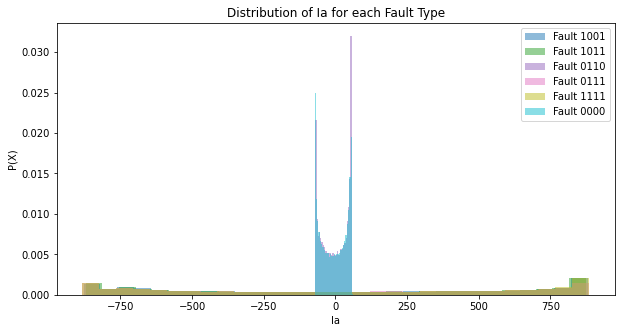

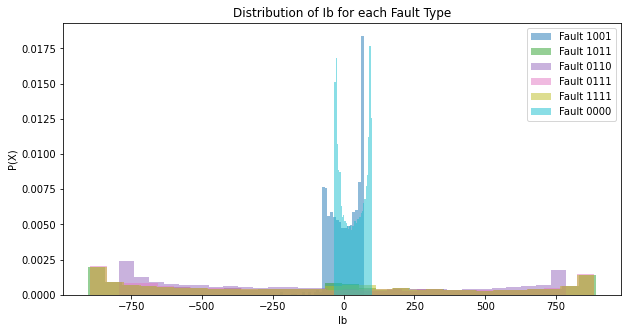

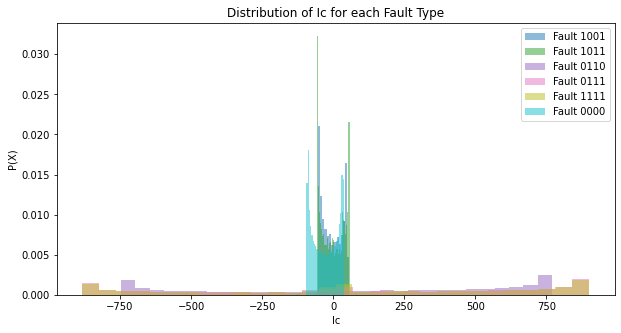

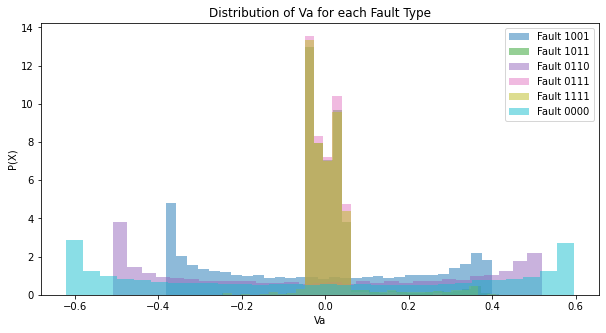

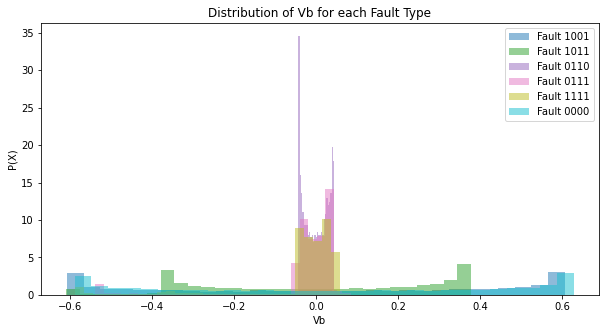

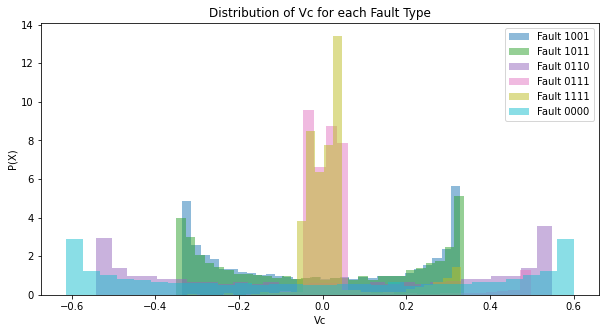

In [4]:
# for label in cols[:-1]:
#     plt.hist(df[df["G"] == 1][label] , color= 'blue' , label="Positive" , alpha = 0.6 , density = True )
#     plt.hist(df[df["G"] == 0][label] , color= 'red' , label="Negative" , alpha = 0.6 , density = True )
#     plt.title(label)
#     plt.ylabel("P(X)")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()
# Combine outputs into one class label like '1001'

input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
unique_faults = df['fault_type'].unique()

colors = plt.cm.get_cmap('tab10', len(unique_faults))

for in_col in input_cols:
    plt.figure(figsize=(10, 5))
    for i, fault in enumerate(unique_faults):
        subset = df[df['fault_type'] == fault]
        plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
                 label=f'Fault {fault}', color=colors(i))
    
    plt.title(f"Distribution of {in_col} for each Fault Type")
    plt.xlabel(in_col)
    plt.ylabel("P(X)")
    plt.legend()

## Train and Validation and Test dataSet

In [5]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def scale_dataset(dataFrame):
    # Extract features (currents and voltages)
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    
    # Extract fault indicators (G, C, B, A)
    y = dataFrame[['G', 'C', 'B', 'A']].values
    
    # Scale the features
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    # Combine scaled features with original fault indicators
    data = np.hstack((x, y))
    
    # Convert fault indicators to binary string and map to fault classes
    y_mapped = []
    for row in y:
        # Convert each indicator to string (0 or 1) and join them
        fault_code = ''.join([str(int(bit)) for bit in row])
        # Map to fault class using the provided mapping
        y_mapped.append(fault_map.get(fault_code, 0))  # default to 0 (No Fault) if code not found
    
    y = np.array(y_mapped)
    
    return data, x, y

# Your fault mapping
fault_map = {
    '0000': 0,  # No Fault
    '1001': 1,  # LG
    '0011': 2,  # LL
    '0110': 3,  # LL
    '1011': 4,  # LLG
    '0111': 5,  # LLL
    '1111': 6   # LLLG
}

In [7]:
##
def save_models(best_model):
        """Save the best model and label encoder."""
        if best_model is not  None:
            joblib.dump(best_model, f'FullRapport/models/{best_model}_model.joblib')
            print("\nBest model saved as 'Machine Learning/Suprivised ML/FullRapport/models/")

            # print("No model to save. Train models first.")
            
        
        # joblib.dump(label_encoder, 'Machine Learning/Suprivised ML/FullRapport/models/label_encoder.joblib')
        # print("Label encoder saved as 'Machine Learning/Suprivised ML/FullRapport/models/label_encoder.joblib'")
    

In [8]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
train , X_train , Y_train = scale_dataset(train)
valid , X_valid , Y_valid = scale_dataset(valid)
test , X_test , Y_test = scale_dataset(test)

Y_train

array([0, 6, 6, ..., 3, 4, 0])

In [9]:
unique_values = np.unique(Y_train)

print(unique_values)

[0 1 3 4 5 6]


# Models

## KNN

In [10]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5 ) # how much neghibor that will effect him
knn_model.fit(X_train , Y_train)
 

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test)
# valeur null

In [13]:
print(classification_report(Y_test, y_pred ))
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(knn_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       0.98      0.99      0.98       207
           3       1.00      0.99      1.00       212
           4       0.91      0.97      0.94       227
           5       0.43      0.52      0.47       213
           6       0.45      0.34      0.38       242

    accuracy                           0.83      1573
   macro avg       0.79      0.80      0.80      1573
weighted avg       0.82      0.83      0.82      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [0, 204, 0, 3, 0, 0], [0, 0, 210, 0, 2, 0], [1, 5, 0, 221, 0, 0], [1, 0, 0, 0, 110, 102], [0, 0, 0, 18, 142, 82]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


In [14]:
# print(df['G'].value_counts())



To understand this result need to know that is mean Precision and Recall
![alt text](image.png)

## Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:

# fault_labels = Y_train.dot(np.array([8, 4, 2, 1]))
# fault_labels_test = Y_test.dot(np.array([8,4,2,1]))

In [17]:
nb_model = GaussianNB()
nb_model.fit(X_train , Y_train)

GaussianNB()

In [18]:
y_pred = nb_model.predict(X_test)
y_pred

array([1, 0, 5, ..., 3, 1, 3])

In [19]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(nb_model)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       472
           1       0.81      0.91      0.86       207
           3       0.90      0.86      0.88       212
           4       0.79      0.83      0.81       227
           5       0.45      0.70      0.55       213
           6       0.52      0.12      0.20       242

    accuracy                           0.77      1573
   macro avg       0.73      0.74      0.71      1573
weighted avg       0.76      0.77      0.74      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [17, 188, 0, 1, 0, 1], [20, 0, 182, 0, 10, 0], [1, 23, 0, 189, 14, 0], [1, 0, 9, 27, 149, 27], [0, 20, 11, 21, 160, 30]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


this worst from the model of KNN 

## Logitic Regression

In [20]:
from sklearn.linear_model import LogisticRegression


In [21]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, Y_train)


In [22]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(lr_model)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50       472
           1       0.00      0.00      0.00       207
           3       0.00      0.00      0.00       212
           4       0.88      0.23      0.36       227
           5       0.25      0.08      0.12       213
           6       0.00      0.00      0.00       242

    accuracy                           0.34      1573
   macro avg       0.24      0.22      0.16      1573
weighted avg       0.26      0.34      0.22      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [207, 0, 0, 0, 0, 0], [186, 0, 0, 0, 26, 0], [175, 0, 0, 52, 0, 0], [181, 0, 8, 7, 17, 0], [210, 0, 7, 0, 25, 0]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## DecisionTreeClassifier


In [24]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


In [25]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)
y_pred

array([1, 1, 6, ..., 3, 4, 3])

In [26]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix print("confusion_matrix:", cm.tolist())
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(dt_model)

              precision    recall  f1-score   support

           0       0.97      0.63      0.76       472
           1       0.59      0.84      0.69       207
           3       0.73      0.92      0.82       212
           4       0.84      0.83      0.83       227
           5       0.44      0.34      0.38       213
           6       0.50      0.67      0.57       242

    accuracy                           0.69      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.73      0.69      0.69      1573

confusion_matrix: [[296, 107, 69, 0, 0, 0], [5, 174, 1, 20, 0, 7], [2, 4, 195, 0, 7, 4], [1, 3, 0, 188, 20, 15], [0, 1, 0, 8, 72, 132], [0, 5, 1, 9, 66, 161]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


[Text(0.5179132620993087, 0.995, 'x[2] <= 0.079\ngini = 0.813\nsamples = 4716\nvalue = [1393, 693, 603, 698, 671, 658]'),
 Text(0.2765556253928347, 0.985, 'x[2] <= -0.337\ngini = 0.765\nsamples = 3678\nvalue = [1393, 693, 246, 698, 321, 327]'),
 Text(0.39723444374607164, 0.99, 'True  '),
 Text(0.13492562329771632, 0.975, 'x[3] <= 0.175\ngini = 0.666\nsamples = 694\nvalue = [0, 0, 220, 0, 243, 231]'),
 Text(0.12822124450031427, 0.965, 'x[3] <= 0.01\ngini = 0.609\nsamples = 550\nvalue = [0, 0, 76, 0, 243, 231]'),
 Text(0.12151686570291222, 0.955, 'gini = 0.0\nsamples = 72\nvalue = [0, 0, 72, 0, 0, 0]'),
 Text(0.13492562329771632, 0.955, 'x[1] <= 2.112\ngini = 0.508\nsamples = 478\nvalue = [0.0, 0.0, 4.0, 0.0, 243.0, 231.0]'),
 Text(0.12822124450031427, 0.945, 'x[0] <= 1.845\ngini = 0.508\nsamples = 472\nvalue = [0, 0, 4, 0, 237, 231]'),
 Text(0.10810810810810811, 0.935, 'x[2] <= -2.444\ngini = 0.509\nsamples = 457\nvalue = [0, 0, 4, 0, 225, 228]'),
 Text(0.10140372931070606, 0.925, 'gini

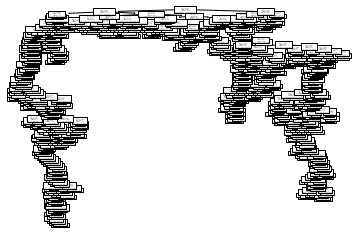

In [27]:
plot_tree(dt_model)


## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier() #if i did this will be bad 
#n_estimators=100, max_depth=2,random_state=0
rf_model = rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([1, 0, 6, ..., 3, 4, 3])

In [30]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(rf_model)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       472
           1       0.84      0.89      0.86       207
           3       1.00      0.96      0.98       212
           4       0.90      0.96      0.93       227
           5       0.46      0.22      0.29       213
           6       0.51      0.77      0.62       242

    accuracy                           0.81      1573
   macro avg       0.78      0.79      0.77      1573
weighted avg       0.81      0.81      0.80      1573

confusion_matrix: [[440, 32, 0, 0, 0, 0], [0, 184, 0, 23, 0, 0], [2, 0, 203, 0, 2, 5], [1, 1, 0, 218, 0, 7], [0, 0, 0, 0, 46, 167], [0, 2, 0, 0, 53, 187]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


## SVC (Support Vector Classifier)

In [31]:
from sklearn.svm import SVC

In [32]:
svc_model = SVC(kernel='linear')
svc_model = svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)
y_pred

array([4, 0, 0, ..., 1, 1, 0])

In [33]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(svc_model)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       472
           1       0.56      0.68      0.61       207
           3       0.81      0.17      0.27       212
           4       0.48      0.78      0.60       227
           5       0.45      0.31      0.37       213
           6       0.21      0.01      0.02       242

    accuracy                           0.57      1573
   macro avg       0.52      0.49      0.44      1573
weighted avg       0.54      0.57      0.49      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [11, 140, 0, 56, 0, 0], [92, 49, 35, 21, 15, 0], [44, 4, 1, 178, 0, 0], [56, 24, 4, 52, 66, 11], [74, 32, 3, 63, 67, 3]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


### using others kernels to get better score

In [34]:
from sklearn.svm import SVC

# Use RBF kernel
svm_model = SVC(kernel='rbf')
svm_model = svm_model.fit(X_train, Y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(svm_model)


              precision    recall  f1-score   support

           0       0.91      1.00      0.96       472
           1       0.88      0.93      0.90       207
           3       0.99      0.79      0.88       212
           4       0.89      0.96      0.93       227
           5       0.45      0.72      0.56       213
           6       0.42      0.15      0.22       242

    accuracy                           0.79      1573
   macro avg       0.76      0.76      0.74      1573
weighted avg       0.78      0.79      0.77      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [12, 192, 0, 3, 0, 0], [29, 0, 168, 0, 15, 0], [1, 6, 1, 219, 0, 0], [1, 1, 0, 8, 154, 49], [1, 19, 0, 15, 171, 36]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


#### Highlights:
- Class 0, 9, 11: Excellent performance (f1-scores around 0.9+).

- Class 6: Much better than before (f1-score up to 0.87 from 0.56).

- Class 15: Still needs work (f1-score ~0.49, but recall improved).

- Class 7: The lowest performer (f1-score ~0.40), possibly due to overlap or low feature separability

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.8s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.7s
[CV] END ......................C=0.1, gamma=0.01

In [36]:
y_pred

array([1, 0, 5, ..., 3, 4, 3])

In [37]:
print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       472
           1       1.00      0.93      0.96       207
           3       1.00      0.99      0.99       212
           4       0.93      0.89      0.91       227
           5       0.50      0.76      0.60       213
           6       0.50      0.33      0.40       242

    accuracy                           0.84      1573
   macro avg       0.82      0.82      0.81      1573
weighted avg       0.85      0.84      0.84      1573

confusion_matrix: [[472, 0, 0, 0, 0, 0], [0, 193, 0, 14, 0, 0], [0, 0, 209, 0, 0, 3], [0, 0, 0, 201, 0, 26], [0, 0, 0, 0, 161, 52], [0, 0, 0, 0, 161, 81]]


In [38]:
print("Best Parameters:", grid.best_params_)
save_models(best_model)


Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


In [39]:
# from sklearn import datasets
# from mlxtend.plotting import plot_decision_regions

# # Only works for 2D data, so reduce dimensions if needed
# X = X_train[:, :2]  # Or use PCA if needed
# y = Y_train

# svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
# svm_model.fit(X, y)

# plt.figure(figsize=(10, 6))
# plot_decision_regions(X, y, clf=svm_model, legend=2)
# plt.title('SVC Decision Boundary with RBF Kernel')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

## SGDClassifier

In [40]:
from sklearn.linear_model import SGDClassifier

In [41]:
sdg_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5 , )
sdg_model.fit(X_train, Y_train)
# Make predictions
y_pred = sdg_model.predict(X_test)

print(classification_report(Y_test, y_pred)) # Compute confusion matrix 
cm = confusion_matrix(Y_test, y_pred)  # Display the confusion matrix 
print("confusion_matrix:", cm.tolist())
save_models(sdg_model)

              precision    recall  f1-score   support

           0       0.43      0.39      0.41       472
           1       0.36      0.18      0.24       207
           3       0.16      0.35      0.22       212
           4       0.31      0.32      0.32       227
           5       0.27      0.30      0.29       213
           6       0.14      0.05      0.08       242

    accuracy                           0.28      1573
   macro avg       0.28      0.27      0.26      1573
weighted avg       0.30      0.28      0.28      1573

confusion_matrix: [[183, 63, 178, 48, 0, 0], [31, 38, 56, 28, 10, 44], [66, 0, 75, 0, 67, 4], [32, 0, 74, 73, 19, 29], [52, 4, 50, 43, 64, 0], [62, 2, 46, 44, 75, 13]]

Best model saved as 'Machine Learning/Suprivised ML/FullRapport/models/


c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [42]:
from xgboost import XGBClassifier



In [43]:

XG_model = XGBClassifier()
XG_model.fit(X_train, Y_train)
predictions = XG_model.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [0 1 3 4 5 6]

(loss: Literal['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'] = "hinge", *, penalty: Literal['l2', 'l1', 'elasticnet'] | None = "l2", alpha: Float = 0.0001, l1_ratio: Float = 0.15, fit_intercept: bool = True, max_iter: Int = 1000, tol: Float | None = 0.001, shuffle: bool = True, verbose: Int = 0, epsilon: Float = ..., n_jobs: Int | None = None, random_state: Int | RandomState | None = None, learning_rate: str = "optimal", eta0: Float = 0, power_t: Float = 0.5, early_stopping: bool = False, validation_fraction: Float = 0.1, n_iter_no_change: Int = 5, class_weight: Mapping[str, float] | str | None = None, warm_start: bool = False, average: int | bool = False) -> SGDClassifier
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

Read more in the User Guide <sgd>.

Parameters
loss : {'hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'}, default='hinge'
The loss function to be used.

'hinge' gives a linear SVM.
'log_loss' gives logistic regression, a probabilistic classifier.
'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.
'squared_hinge' is like hinge but is quadratically penalized.
'perceptron' is the linear loss used by the perceptron algorithm.
The other losses, 'squared_error', 'huber', 'epsilon_insensitive' and 'squared_epsilon_insensitive' are designed for regression but can be useful in classification as well; see ~sklearn.linear_model.SGDRegressor for a description.
More details about the losses formulas can be found in the User Guide <sgd_mathematical_formulation> and you can find a visualisation of the loss functions in sphx_glr_auto_examples_linear_model_plot_sgd_loss_functions.py.

penalty : {'l2', 'l1', 'elasticnet', None}, default='l2'
The penalty (aka regularization term) to be used. Defaults to 'l2' which is the standard regularizer for linear SVM models. 'l1' and 'elasticnet' might bring sparsity to the model (feature selection) not achievable with 'l2'. No penalty is added when set to None.

You can see a visualisation of the penalties in sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py.

alpha : float, default=0.0001
Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when learning_rate is set to 'optimal'. Values must be in the range [0.0, inf).

l1_ratio : float, default=0.15
The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1. Only used if penalty is 'elasticnet'. Values must be in the range [0.0, 1.0].

fit_intercept : bool, default=True
Whether the intercept should be estimated or not. If False, the data is assumed to be already centered.

max_iter : int, default=1000
The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method. Values must be in the range [1, inf).

versionadded

0.19

tol : float or None, default=1e-3
The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter. Values must be in the range [0.0, inf).

versionadded

0.19

shuffle : bool, default=True
Whether or not the training data should be shuffled after each epoch.

verbose : int, default=0
The verbosity level. Values must be in the range [0, inf).

epsilon : float, default=0.1
Epsilon in the epsilon-insensitive loss functions; only if loss is 'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'. For 'huber', determines the threshold at which it becomes less important to get the prediction exactly right. For epsilon-insensitive, any differences between the current prediction and the correct label are ignored if they are less than this threshold. Values must be in the range [0.0, inf).

n_jobs : int, default=None
The number of CPUs to use to do the OVA (One Versus All, for multi-class problems) computation. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary <n_jobs> for more details.

random_state : int, RandomState instance, default=None
Used for shuffling the data, when shuffle is set to True. Pass an int for reproducible output across multiple function calls. See Glossary <random_state>. Integer values must be in the range [0, 2**32 - 1].

learning_rate : str, default='optimal'
The learning rate schedule:

'constant': eta = eta0
'optimal': eta = 1.0 / (alpha * (t + t0)) where t0 is chosen by a heuristic proposed by Leon Bottou.
'invscaling': eta = eta0 / pow(t, power_t)
'adaptive': eta = eta0, as long as the training keeps decreasing. Each time n_iter_no_change consecutive epochs fail to decrease the training loss by tol or fail to increase validation score by tol if early_stopping is True, the current learning rate is divided by 5.
versionadded

0.20 Added 'adaptive' option.

eta0 : float, default=0.0
The initial learning rate for the 'constant', 'invscaling' or 'adaptive' schedules. The default value is 0.0 as eta0 is not used by the default schedule 'optimal'. Values must be in the range [0.0, inf).

power_t : float, default=0.5
The exponent for inverse scaling learning rate. Values must be in the range (-inf, inf).

early_stopping : bool, default=False
Whether to use early stopping to terminate training when validation score is not improving. If set to True, it will automatically set aside a stratified fraction of training data as validation and terminate training when validation score returned by the score method is not improving by at least tol for n_iter_no_change consecutive epochs.

See sphx_glr_auto_examples_linear_model_plot_sgd_early_stopping.py for an example of the effects of early stopping.

versionadded

0.20 Added 'early_stopping' option

validation_fraction : float, default=0.1
The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if early_stopping is True. Values must be in the range (0.0, 1.0).

versionadded

0.20 Added 'validation_fraction' option

n_iter_no_change : int, default=5
Number of iterations with no improvement to wait before stopping fitting. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter. Integer values must be in the range [1, max_iter).

versionadded

0.20 Added 'n_iter_no_change' option

class_weight : dict, {class_label: weight} or "balanced", default=None
Preset for the class_weight fit parameter.

Weights associated with classes. If not given, all classes are supposed to have weight one.

The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

warm_start : bool, default=False
When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. See the Glossary <warm_start>.

Repeatedly calling fit or partial_fit when warm_start is True can result in a different solution than when calling fit a single time because of the way the data is shuffled. If a dynamic learning rate is used, the learning rate is adapted depending on the number of samples already seen. Calling fit resets this counter, while partial_fit will result in increasing the existing counter.

average : bool or int, default=False
When set to True, computes the averaged SGD weights across all updates and stores the result in the coef_ attribute. If set to an int greater than 1, averaging will begin once the total number of samples seen reaches average. So average=10 will begin averaging after seeing 10 samples. Integer values must be in the range [1, n_samples].

Attributes
**** : ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
Weights assigned to the features.

**** : ndarray of shape (1,) if n_classes == 2 else (n_classes,)
Constants in decision function.

n_iter_ : int
The actual number of iterations before reaching the stopping criterion. For multiclass fits, it is the maximum over every binary fit.

**** : array of shape (n_classes,)

t_ : int
Number of weight updates performed during training. Same as (n_iter_ * n_samples + 1).

n_features_in_ : int
Number of features seen during fit.

versionadded

0.24

**** : ndarray of shape (n_features_in_,)
Names of features seen during fit. Defined only when X has feature names that are all strings.

versionadded

1.0

See Also
sklearn.svm.LinearSVC : Linear support vector classification.

LogisticRegression : Logistic regression.

Perceptron : Inherits from SGDClassifier. Perceptron() is equivalent to SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).

Examples
>>> import numpy as np
>>> from sklearn.linear_model import SGDClassifier
>>> from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import make_pipeline
>>> X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
>>> Y = np.array([1, 1, 2, 2])
>>> # Always scale the input. The most convenient way is to use a pipeline.
>>> clf = make_pipeline(StandardScaler(),
...                     SGDClassifier(max_iter=1000, tol=1e-3))
>>> clf.fit(X, Y)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])
>>> print(clf.predict([[-0.8, -1]]))
[1]
